In [22]:
# @title Libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

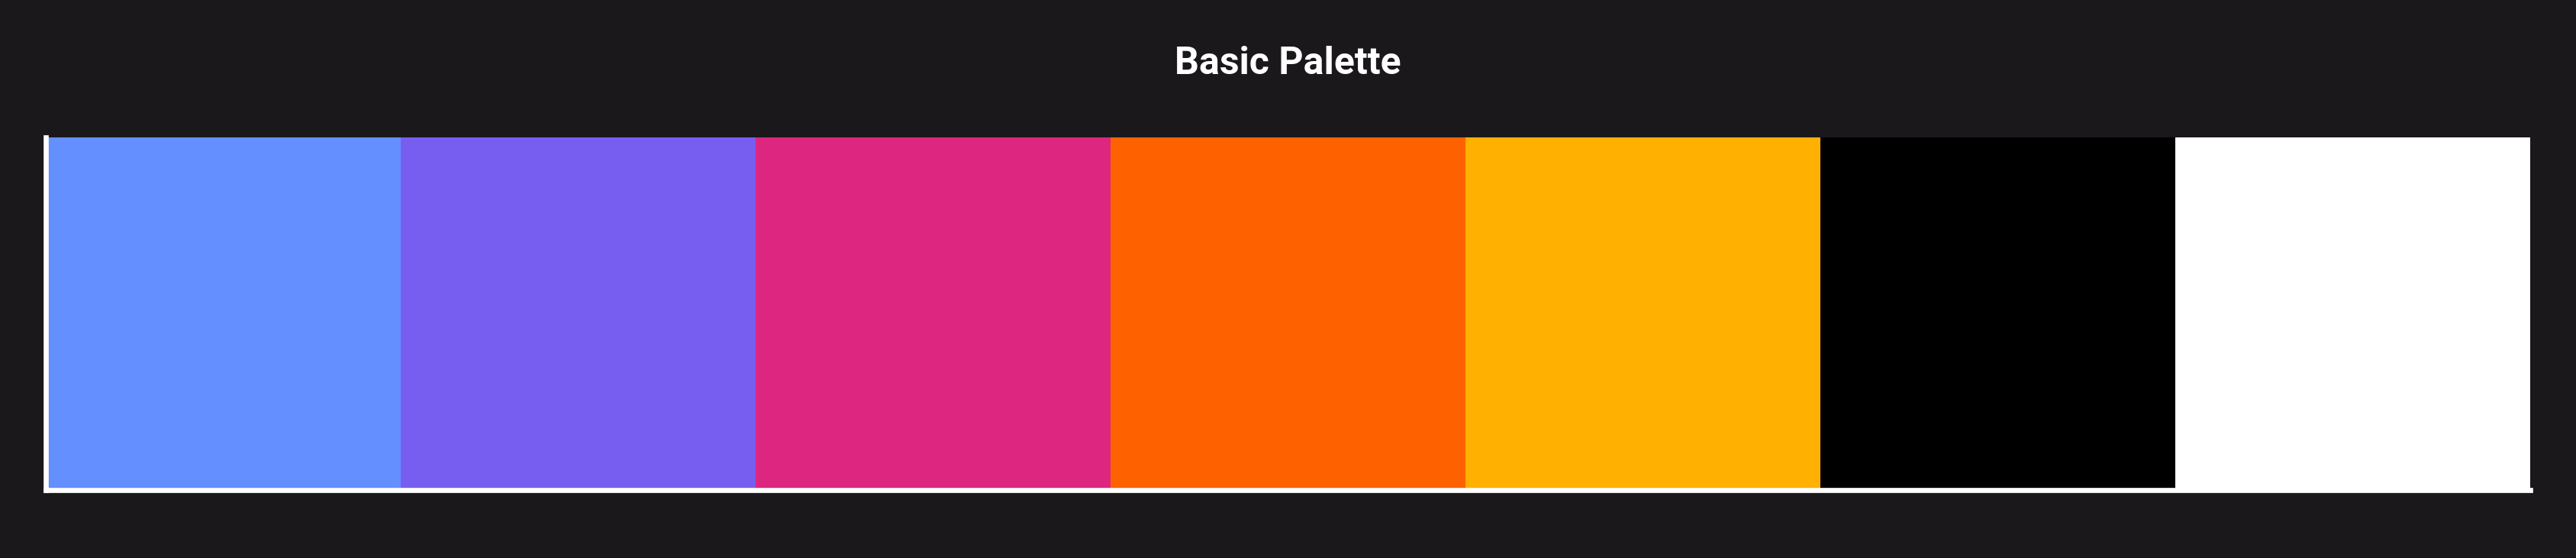

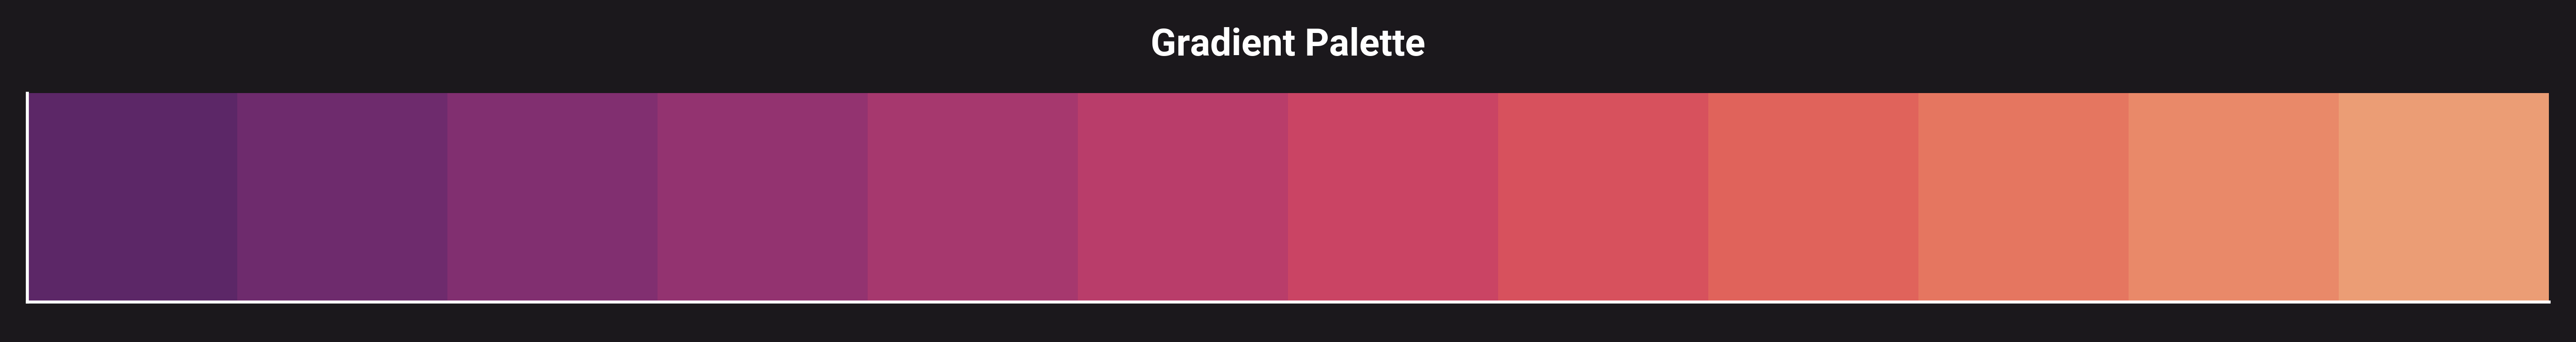

In [23]:
# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)


plt.show()

In [24]:
# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts()

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

In [25]:
# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

Data Set

preprocessed by renaming columns and converting to appropriate types

In [26]:
df = pd.read_csv("disasters_dataset.csv")
df = df.rename(columns={'ISO3':'Country Code', 'Country / Territory': 'Country', 'Disaster Internal Displacements (Raw)': 'DID'})
df['DID'] = df['DID'].astype(int)
df['Year'] = df['Year'].astype(int)
print(df)
df_PHL = df[df['Country Code'] == 'PHL']
df_IDN = df[df['Country Code'] == 'IDN']
df_VNM = df[df['Country Code'] == 'VNM']
print(df_PHL)
print(df_IDN)
print(df_VNM)

df_PHL_data = df_PHL.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
df_VNM_data = df_VNM.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
df_IDN_data = df_IDN.groupby(['Hazard Type', 'Year'])['DID'].sum().reset_index()
print(df_PHL_data)
df_PHL_data_year = df_PHL_data.groupby(['Year'])['DID'].sum().reset_index()
df_VNM_data_year = df_VNM_data.groupby(['Year'])['DID'].sum().reset_index()
df_IDN_data_year = df_IDN_data.groupby(['Year'])['DID'].sum().reset_index()
print(df_PHL_data_year)
print(df_VNM_data_year)
print(df_IDN_data_year)
print(min(df_PHL_data_year['DID'].min(), df_VNM_data_year['DID'].min(), df_IDN_data_year['DID'].min()))
print(max(df_PHL_data_year['DID'].max(), df_VNM_data_year['DID'].max(), df_IDN_data_year['DID'].max()))

     Country Code      Country  Year   DID Hazard Type
0             IDN    Indonesia  2018    40       Storm
1             IDN    Indonesia  2018    52       Storm
2             IDN    Indonesia  2018  1758       Flood
3             IDN    Indonesia  2018     4       Flood
4             PHL  Philippines  2018     4  Earthquake
...           ...          ...   ...   ...         ...
2561          IDN    Indonesia  2018   167       Storm
2562          IDN    Indonesia  2018    26       Flood
2563          PHL  Philippines  2018  7746       Storm
2564          VNM      Vietnam  2018    54       Storm
2565          IDN    Indonesia  2018   307       Storm

[2566 rows x 5 columns]
     Country Code      Country  Year     DID    Hazard Type
4             PHL  Philippines  2018       4     Earthquake
12            PHL  Philippines  2018    7358  Mass Movement
17            PHL  Philippines  2018   13925          Flood
40            PHL  Philippines  2018   32309          Storm
42            P

Nutshell Plot

In [33]:
f, ax = plt.subplots(1, 3, figsize=(16, 8), sharey=True, squeeze=True)
sns.despine(f)

sns.barplot(
    data = df_VNM_data_year,
    x="Year", y="DID",
    palette=[colors[0]],
    ax=ax[0]
)
ax[0].xaxis.set_major_formatter(plt.ScalarFormatter())
ax[0].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[0].set_xticks([0, 14], labels=['2008', '2022'])
ax[0].set(xlabel="", ylabel="Internal Displacements")
ax[0].set_ylabel(ylabel="Internal Displacements (in millions)", labelpad=10, fontsize=22)
ax[0].set_title('Vietnam', loc='center', y=-0.3)
ax[0].grid(axis='y')
#ax[0].legend(['Drought', 'Earthquake', 'Extreme Temperature', 'Flood', 'Mass Movement', 'Storm', 'Volcanic Activity', 'Wave action', 'Wildfire'])
sns.barplot(
    data = df_PHL_data_year,
    x="Year", y="DID",
    palette=[colors[2]],
    ax=ax[1]
)
ax[1].xaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].set_xticks([0, 14], labels=['2008', '2022'])
ax[1].set(xlabel="", ylabel="")
ax[1].set_title('Philippines', loc='center', y=-0.3)
ax[1].grid(axis='y')
sns.despine(ax=ax[1], left=True)

sns.barplot(
    data = df_IDN_data_year,
    x="Year", y="DID",
    palette=[colors[4]],
    ax=ax[2]
)
ax[2].xaxis.set_major_formatter(plt.ScalarFormatter())
ax[2].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[2].set_xticks([0, 14], labels=['2008', '2022'])
ax[2].set_yticks([0, 1750000, 3500000, 5250000, 7000000], labels=['0', '1.75', '3.50',  '5.25', '7.00'])
ax[2].set(xlabel="", ylabel="")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
ax[2].set_title('Indonesia', loc='center', y=-0.3)
ax[2].grid(axis='y')
sns.despine(ax=ax[2], left=True)

f.subplots_adjust(wspace=0.01, hspace=0.3)
f.suptitle('Total Internal Displacements in Southeast Asian Countries', weight='bold')
custom_text = "Data Source: IDMC - Global International Displacement Database (2023)\nChart: W. Jose, A. Sarmiento, A. Zamuco, PILIPINUTS 2023"
plt.text(0.95, 0.001, custom_text, horizontalalignment='right', verticalalignment='bottom', transform=plt.gcf().transFigure, fontsize=12, color='white')
plt.tight_layout()
f.set_size_inches(19.20, 10.80)
plt.savefig('Nutshell_plot.pdf', dpi=300, orientation='portrait')
plt.show()

RQ1 Plot